黒の出力が0、ニューロンが興奮していない

白の力が1、ニューロンが興奮している

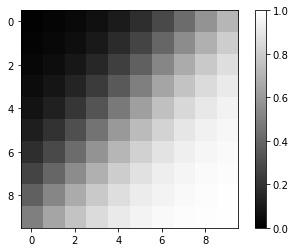

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-1.0,1.0,0.2)
y = np.arange(-1.0,1.0,0.2)
z = np.zeros((10,10))

wx = 2.5
wy = 3.0
bias = 1.0

for i,a in enumerate(x):
    for j,b in enumerate(y):
        u = x[i]*wx + y[j]*wy + bias
        tmp = 1/(1+np.exp(-u))
        z[i][j] = tmp

plt.imshow(z,'gray',vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()

## 4.6.3ニューラルネットワークの実装

中間層を導入するとニューロンがより複雑な条件で興奮することが確認できる。

$$
中間層:f(\vec{u_j} = \vec{x_j}w_{im}+\vec{b_{im}})
$$

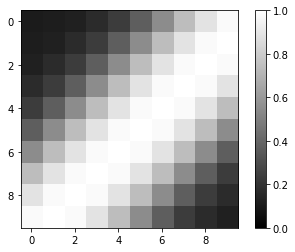

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-1.0,1.0,0.2)
y = np.arange(-1.0,1.0,0.2)
z = np.zeros((10,10))

w_im = np.array([[4.0,4.0],[4.0,4.0]])
w_mo = np.array([[1.0],[-1.0]])

b_im = np.array([3,-3])
b_mo = np.array([0.1])

def middle_layer(x, w, b):
    u = np.dot(x,w) + b
    return 1/(1+np.exp(-u))

def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return u

for i,a in enumerate(x):
    for j,b in enumerate(y):
        inp = np.array([x[i],y[j]])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)
        
        z[i][j] = out[0]

plt.imshow(z,'gray',vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()

## ニューラルネットワーク(分類)

$$
w_{im} = \left(
    \begin{array}{ccc}
      1 & 2 \\
      2 & 3 \\
    \end{array}
  \right)
$$

$$
w_{mo} = \left(
    \begin{array}{ccc}
      -1 & 1 \\
      1 & -1 \\
    \end{array}
  \right)
$$

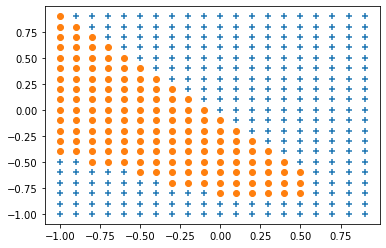

In [7]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(-1.0,1.0,0.1)
Y = np.arange(-1.0,1.0,0.1)

w_im = np.array([[1,2],[2,3]])
w_mo = np.array([[-1,1],[1,-1]])

b_im = np.array([0.3,-0.3])
b_mo = np.array([0.4,0.1])

def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1/(1+np.exp(-u))

def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return np.exp(u)/np.sum(np.exp(u))

x_1 =[]
y_1 =[]
x_2 =[]
y_2 =[]

for i in range(20):
    for j in range(20):
        inp = np.array([X[i], Y[j]])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)
        
        if out[0] > out[1]:
            x_1.append(X[i])
            y_1.append(Y[j])
        else:
            x_2.append(X[i])
            y_2.append(Y[j])
            
plt.scatter(x_1, y_1, marker='+')
plt.scatter(x_2, y_2, marker='o')
plt.show()